# Task 2: Customer Segmentation / Clustering

In [4]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [8]:
customers = pd.read_csv('/content/drive/MyDrive/Zeotap/Customers.csv')
products = pd.read_csv('/content/drive/MyDrive/Zeotap/Products.csv')
transactions = pd.read_csv('/content/drive/MyDrive/Zeotap/Transactions.csv')

In [10]:
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])
data = transactions.merge(customers, on='CustomerID').merge(products, on='ProductID')

Feature engineering for customer profiles

In [12]:
customer_features = data.groupby('CustomerID').agg({
    'TotalValue': 'sum',                           # Total spending
    'Quantity': 'sum',                             # Total quantity purchased
    'ProductID': lambda x: x.nunique(),            # Unique products purchased
    'TransactionDate': lambda x: (datetime.now() - x.max()).days  # Recency of last purchase
}).reset_index()
customer_features.columns = ['CustomerID', 'TotalSpending', 'TotalQuantity', 'UniqueProducts', 'Recency']


Standardize features (excluding 'CustomerID')

In [13]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(customer_features.iloc[:, 1:])

Apply KMeans clustering

In [14]:
kmeans = KMeans(n_clusters=4, random_state=42)
customer_features['Cluster'] = kmeans.fit_predict(scaled_features)

Evaluate clustering using Davies-Bouldin Index

In [15]:
db_index = davies_bouldin_score(scaled_features, customer_features['Cluster'])
print("Davies-Bouldin Index:", db_index)

Davies-Bouldin Index: 0.9665563280787469


Visualize clusters (using the first two features for simplicity)

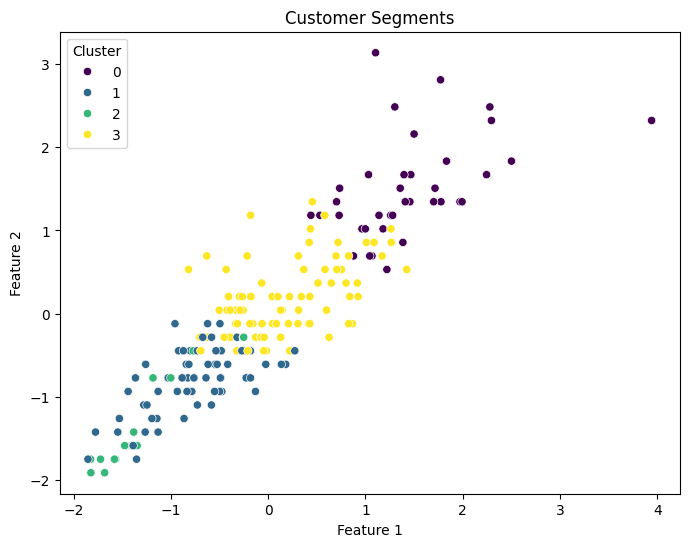

In [16]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=scaled_features[:, 0], y=scaled_features[:, 1],  # Plot first two standardized features
    hue=customer_features['Cluster'], palette='viridis'
)
plt.title("Customer Segments")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend(title="Cluster")
plt.show()